In [1]:
import pandas.io.data as web
import datetime

start = datetime.datetime(2014,1,1)
end = datetime.datetime(2016, 1, 1)

df = web.DataReader('F', 'yahoo', start, end)

/Users/ithallo/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
import numpy as np
X = df.as_matrix()
result = np.where(X[1:, 5] > X[0:-1, 5], 1, -1)

X = np.hstack((X[0:-1,:], result.reshape((result.shape[0],1))))
print X
NUM_DAYS = 30
NUM_COLS = X.shape[1]

new_X = np.array([])
for i in np.arange(NUM_DAYS - 1, X.shape[0]):
    x = X[i - (NUM_DAYS - 1) : i+1, :].ravel()
    if new_X.shape[0] == 0:
        new_X = x
    else:
        new_X = np.vstack((new_X, x))
        
y = new_X[1:, -1]
X = new_X[0:-1, :-1]
    

[[  1.54200000e+01   1.54500000e+01   1.52800000e+01 ...,   3.15285000e+07
    1.37524900e+01   1.00000000e+00]
 [  1.55200000e+01   1.56400000e+01   1.53000000e+01 ...,   4.61223000e+07
    1.38148400e+01   1.00000000e+00]
 [  1.57200000e+01   1.57600000e+01   1.55200000e+01 ...,   4.26576000e+07
    1.38771890e+01  -1.00000000e+00]
 ..., 
 [  1.42800000e+01   1.43400000e+01   1.41600000e+01 ...,   1.36975000e+07
    1.35677140e+01   1.00000000e+00]
 [  1.42800000e+01   1.43000000e+01   1.41500000e+01 ...,   1.88678000e+07
    1.36155540e+01  -1.00000000e+00]
 [  1.42300000e+01   1.42600000e+01   1.41200000e+01 ...,   1.38003000e+07
    1.35581460e+01  -1.00000000e+00]]


In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



In [4]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=0.5)
svm.fit(X_train_std, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.47


/Users/ithallo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


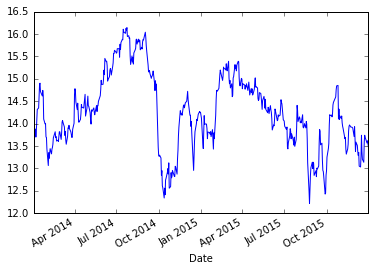

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Adj Close'].plot()

In [7]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 0.5, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']


In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train_std, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_std)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision
()


/Users/roberto/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 0.5, 'gamma': 0.01}
()
Grid scores on development set:
()
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 1e-05}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.1}
0.548 (+/-0.200) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.01}
0.450 (+/-0.320) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.001}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.0001}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 1e-05}
0.267 (+/-0.006) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.500 (+/-0.054) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.503 (+/-0.120) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.267 (+/-0.006) for {'kernel': 'rbf',